In [15]:
import numpy as np
import pandas as pd
import os
import glob
import shutil
import tqdm
import torch
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from dataset_tools import OwnDataset, MNIST
import matplotlib.pyplot as plt

from plotting import show_img


In [3]:
data_path = "data/singh_cp_pipeline_singlecell_images"

folder_paths = glob.glob(os.path.join(data_path, "*"))

len(folder_paths)

# folder_paths

subset_folder_paths = folder_paths[:50]

# copy the first 50 folders to a new directory
new_data_path = "data_subset/singh_cp_pipeline_singlecell_images"


In [4]:
for folder_path in subset_folder_paths:
    folder_name = folder_path.split("\\")[-1]
    new_folder_path = os.path.join(new_data_path, folder_name)
    shutil.copytree(folder_path, new_folder_path)
    print(f"Copying {folder_name} to {new_folder_path}")

In [5]:
# combine all the npy files into a single numpy array
npy_files = glob.glob(os.path.join(new_data_path, "*", "*.npy"))
len(npy_files)

file_1 = np.load(npy_files[0])
file_2 = np.load(npy_files[1])

total_data = np.array([])




In [6]:
# use tqdm to see progress

# for i, npy_file in enumerate(tqdm.tqdm(npy_files)):
#     data = np.load(npy_file)
#     data = (data / np.max(data) * 255).astype(np.int8)
#     if i == 0:
#         total_data = np.expand_dims(data, axis=0)
#     else:
#         total_data = np.vstack((total_data, np.expand_dims(data, axis=0)))
#     if i == 10:
#         break

In [7]:
dataset = MNIST(train=True, transform=transforms.ToTensor())
dataset

In [8]:
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [9]:
x, y = next(iter(loader))

y

tensor([7, 9, 5, 9, 7, 4, 2, 6, 5, 9, 1, 1, 8, 7, 8, 8, 7, 4, 9, 5, 1, 9, 7, 1,
        7, 6, 6, 3, 4, 8, 1, 3])

In [18]:

def npy_loader(path):
    """
    load a npy file and change the dtype to int8
    """
    sample = np.load(path)

    sample = (sample / np.max(sample) * 255).astype(np.uint8)

    sample = torch.from_numpy(sample)
    # make channel the first dimension
    sample = sample.permute(2, 0, 1)

    return sample


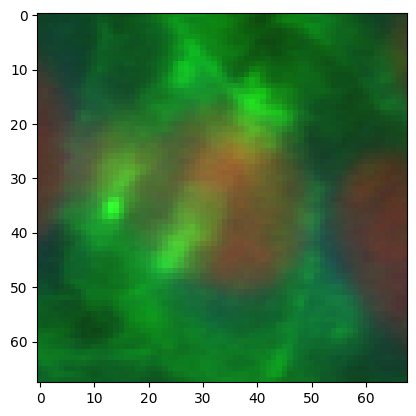

In [23]:
dataset = datasets.DatasetFolder("data_subset/singh_cp_pipeline_singlecell_images", loader=npy_loader, extensions=('.npy',))
# dataset = OwnDataset()

dataset[3050][0].shape
show_img(dataset[3051][0])

In [16]:
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# metadata

In [18]:
# df_metadata = pd.read_csv("metadata.csv", index_col=0)
# df_features = pd.read_csv("CPfeatures.csv", index_col=0) # very large file (4.2 GB)

# read from parquet instead of csv
df_metadata = pd.read_parquet("metadata.parquet")
df_features = pd.read_parquet("CPfeatures.parquet")

In [21]:
df_metadata.head()
df_features.head()

,ImageNumber,ObjectNumber,Metadata_folder,Metadata_well,Cytoplasm_AreaShape_Area,Cytoplasm_AreaShape_Center_X,Cytoplasm_AreaShape_Center_Y,Cytoplasm_AreaShape_Compactness,Cytoplasm_AreaShape_Eccentricity,Cytoplasm_AreaShape_Extent,...,dapi_name,actin_name,tubulin_name,single_img_name,plate_well,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Image_Metadata_Compound,Image_Metadata_Concentration,moa
0,1.0,7.0,Week10_40111,B02,0.193999,-2.057102,-0.689976,-0.104216,0.646993,1.125279,...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111_B02,Week10_40111,B02,DMSO,0.0,DMSO
1,1.0,8.0,Week10_40111,B02,-0.562693,1.533842,-0.876157,-0.486278,-0.768380,0.803726,...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111_B02,Week10_40111,B02,DMSO,0.0,DMSO
2,1.0,9.0,Week10_40111,B02,0.717717,-1.877555,-0.317613,-0.660598,-1.629161,0.080157,...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111_B02,Week10_40111,B02,DMSO,0.0,DMSO
3,1.0,10.0,Week10_40111,B02,0.017374,-0.441177,0.427112,-0.475127,-1.047884,-0.305084,...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111_B02,Week10_40111,B02,DMSO,0.0,DMSO
4,1.0,11.0,Week10_40111,B02,-0.226017,-1.698008,-2.737971,0.912409,1.299734,-1.537763,...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111_B02,Week10_40111,B02,DMSO,0.0,DMSO
